In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Analysis



In [64]:
df = pd.read_csv('fraud.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1499 non-null   int64  
 1   type            1499 non-null   object 
 2   amount          1499 non-null   float64
 3   nameOrig        1499 non-null   object 
 4   oldbalanceOrg   1499 non-null   float64
 5   newbalanceOrig  1499 non-null   float64
 6   nameDest        1499 non-null   object 
 7   oldbalanceDest  1499 non-null   float64
 8   newbalanceDest  1499 non-null   float64
 9   isFraud         1499 non-null   int64  
 10  isFlaggedFraud  1499 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 128.9+ KB


In [66]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [67]:
df.shape

(1499, 11)

# Data Cleaning

In [68]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1494,False,False,False,False,False,False,False,False,False,False,False
1495,False,False,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,False


In [69]:
df.sum()

step                                                           1499
type              PAYMENTPAYMENTTRANSFERCASH_OUTPAYMENTPAYMENTPA...
amount                                                 174161723.66
nameOrig          C1231006815C1666544295C1305486145C840083671C20...
oldbalanceOrg                                         1292936217.05
newbalanceOrig                                        1320827503.45
nameDest          M1979787155M2044282225C553264065C38997010M1230...
oldbalanceDest                                         974447915.41
newbalanceDest                                        1616135413.32
isFraud                                                         525
isFlaggedFraud                                                    0
dtype: object

In [70]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [71]:
df.duplicated().sum()

0

In [72]:
df['isFraud'].unique()

array([1, 0], dtype=int64)

In [73]:
df['nameOrig'].value_counts()

C1231006815    1
C2031927175    1
C697460450     1
C559050604     1
C1278616846    1
              ..
C95369743      1
C312168418     1
C1972143064    1
C1348115836    1
C609389093     1
Name: nameOrig, Length: 1499, dtype: int64

In [74]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [75]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,1,0
1,1,0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,3,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1494,1,0,1380.95,C800493254,32860.06,31479.11,M225553858,0.00,0.00,0,0
1495,1,3,29587.32,C987595204,31479.11,1891.79,C998351292,1751806.56,1015132.48,1,0
1496,1,0,1056.64,C438123546,5578.00,4521.36,M29774113,0.00,0.00,0,0
1497,1,0,2515.46,C22668134,270.00,0.00,M1474072872,0.00,0.00,0,0


# Feature Selection

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest'], axis=1, inplace=True)
y = X.pop('isFraud')

# Data spliting Traning & Testing

In [77]:
# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

#  Applying StandardScaler

In [78]:
sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)

In [79]:
X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [80]:
X_train.shape

(840, 6)

In [81]:
X_train.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest',
       'isFlaggedFraud'],
      dtype='object')

In [82]:
X_train['step'].unique

<bound method Series.unique of 1329    0.0
757     0.0
405     0.0
409     0.0
1183    0.0
       ... 
1479    0.0
1483    0.0
1486    0.0
1488    0.0
1495    0.0
Name: step, Length: 840, dtype: float64>

In [83]:
X_train['step'].dtype

dtype('float64')

In [84]:
X_test.shape

(299, 6)

In [85]:
y_test.shape

(299,)

## Random Forest Algorithm

In [86]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:AUC: 92%')

Random Forest Classifier:AUC: 92%


# Evaluation Graphs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'False Positive Rate')

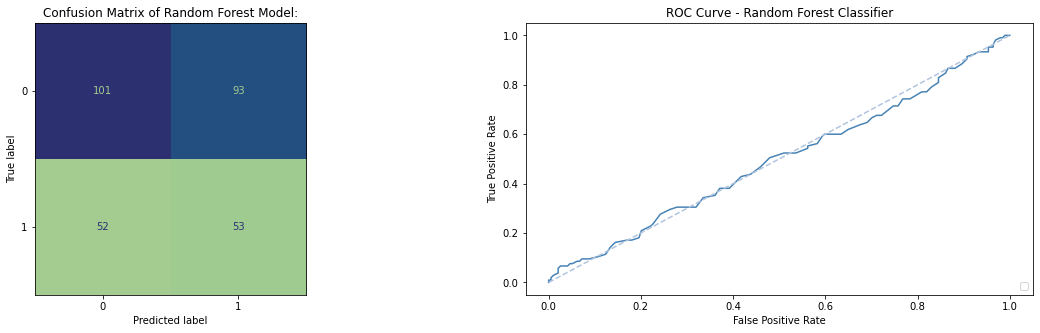

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')


# Model Save

In [88]:
import pickle
# Save the trained model to a file using pickle
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to model.pkl


#  Testing Practice

In [101]:
import pickle
import numpy as np

# Load the model from the file
model_filename = 'model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Prompt the user for inputs
print("Enter the 6 input features for the model (separated by spaces):")
user_input = input()  # This will be a string of numbers separated by spaces

# Convert the user input to a numpy array
input_features = np.array([int(x) for x in user_input.split()]).reshape(1, -1)

# Ensure the input shape matches the model's expected input shape
assert input_features.shape[1] == 6, "The model expects 6 features."

# Use the loaded model to make a prediction
prediction = loaded_model.predict(input_features)

print("Prediction:", prediction)


Enter the 6 input features for the model (separated by spaces):
356 256 356 24 89 54
Prediction: [0]


C:\Users\verti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
